In [ ]:
# Create second Training dataset

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

In [22]:
data = pd.read_parquet(Path("../data") / "train.parquet")

In [23]:
critical_coutners = []
critical_dates = []

for location in data["counter_name"].unique():

    location_data = data[data["counter_name"] == location].groupby(pd.Grouper(freq="1d", key="date"))[["log_bike_count"]].sum()

    if location_data.loc[location_data['log_bike_count'] == 0].shape[0] != 0:
        critical_dates.append(location_data.loc[location_data['log_bike_count'] == 0].index)
        critical_coutners.append(location)

In [24]:
for location, dates in zip(critical_coutners, critical_dates):
    for date in dates:
        # Filter the original dataset for the given location and date, then replace 'log_bike_count' with np.nan
        mask = (data["counter_name"] == location) & (data["date"].dt.date == date.date())
        data.loc[mask, "log_bike_count"] = np.nan
        
    location_mean = data.loc[data["counter_name"] == location, "log_bike_count"].mean()
    data["log_bike_count"].fillna(location_mean, inplace=True)
        

FileNotFoundError: [Errno 2] No such file or directory: '../models/iterations/Voie Georges Pompidou NE-SO_mean_imputation.png'

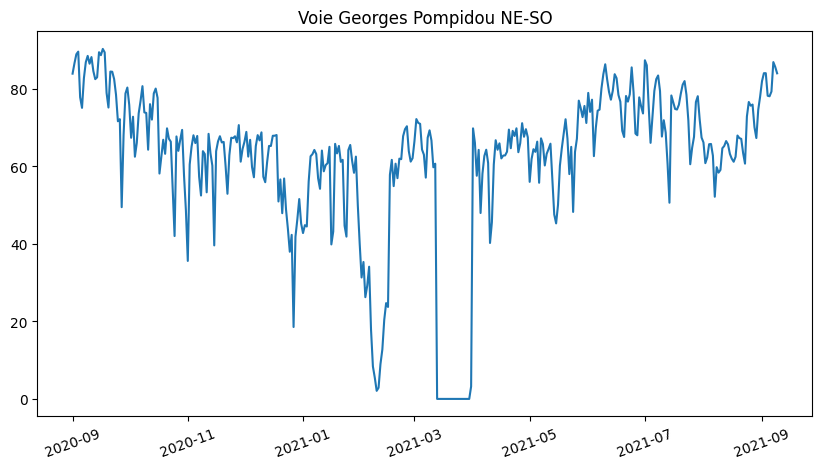

In [25]:
# Plot all bike_count evolution over the year for each counter

from matplotlib import pyplot as plt

counters = data["counter_name"].unique()

for counter in critical_coutners:
    
    mask = (data["counter_name"] == counter)
    plt.figure(figsize=(10,5))
    plt.plot(data[mask].groupby(pd.Grouper(freq="1d", key="date"))[["log_bike_count"]].sum())
    plt.title(counter)
    plt.xticks(rotation=20)
    
    plt.savefig(f'../models/iterations/{counter}_mean_imputation.png')
    
    

# Deleting values

In [8]:
critical_coutners = []
critical_dates = []

for location in data["counter_name"].unique():

    location_data = data[data["counter_name"] == location].groupby(pd.Grouper(freq="1d", key="date"))[["log_bike_count"]].sum()

    if location_data.loc[location_data['log_bike_count'] == 0].shape[0] != 0:
        critical_dates.append(location_data.loc[location_data['log_bike_count'] == 0].index)
        critical_coutners.append(location)

In [11]:
for location, dates in zip(critical_coutners, critical_dates):
    for date in dates:
        # Filter the original dataset for the given location and date, then replace 'log_bike_count' with np.nan
        mask = (data["counter_name"] == location) & (data["date"].dt.date == date.date())
        data.loc[mask, "log_bike_count"] = np.nan

In [10]:
data.head(2)

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147


In [14]:
data.isna().sum()

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [15]:
data.to_parquet('../data/train_dropped.parquet.gzip',
              compression='gzip') 

pd.read_parquet('../data/train_dropped.parquet.gzip') 

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,6.100319
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,4.983607
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,5.389072
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,3.091042
